# Loan Prediction

### Classification Problem

#### Setting up the environment

In [1]:
# importing modules

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
# setting display options

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Loading up the data

In [3]:
# displaying all the train data
! cat train_u6lujuX_CVtuZ9i.csv

In [4]:
# loading the data into a dataset
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
# checking total training samples and features
df.shape

(614, 13)

In [6]:
# names of columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], dtype='object')

In [7]:
# basic description of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Observations:**
* A difference in total number in observations is seen in `LoanAmount`, `Loan_Amount_Term` and `CreditHistory`.

**Inferences:**
* All these three columns need to be treated for missing values

**Description of the data:**
* Loan_ID
    * unique identifier
* Gender
    * binary categorical variable
* Married
    * binary categorical variable
* Dependents
    * multi categorical variable
* Education
    * binary catergorical variable
* Self_Employed
    * binary categorical variable
* ApplicantIncome
    * continuous variable
* CoapplicantIncome
    * continuous variable
* LoanAmount
    * continuous variable
* Loan_Amount_Term
    * multi categorical variable
* Credit_History
    * binary categorical variable
* Property_Area
    * multi categorical variable
* Loan_Status
    * binary target variable

#### Exploratory data analysis and visualisations

In [8]:
# exploring target variable
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

Y    422
N    192
Name: Loan_Status, dtype: int64


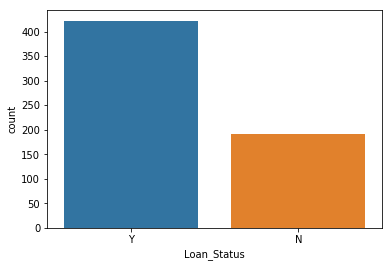

In [9]:
# seeing counts
print(df['Loan_Status'].value_counts())

sns.countplot(df['Loan_Status'])

**Observations:**
* There are no missing values in the target variable
* The number of loan approvals is a little over twice of non-approvals

**Inferences:**
* No missing value treatment required and this can be used to cleanly create splits during visualisations
* Might require imbalanced class treatment

In [10]:
# exploring gender
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

Male      489
Female    112
Name: Gender, dtype: int64


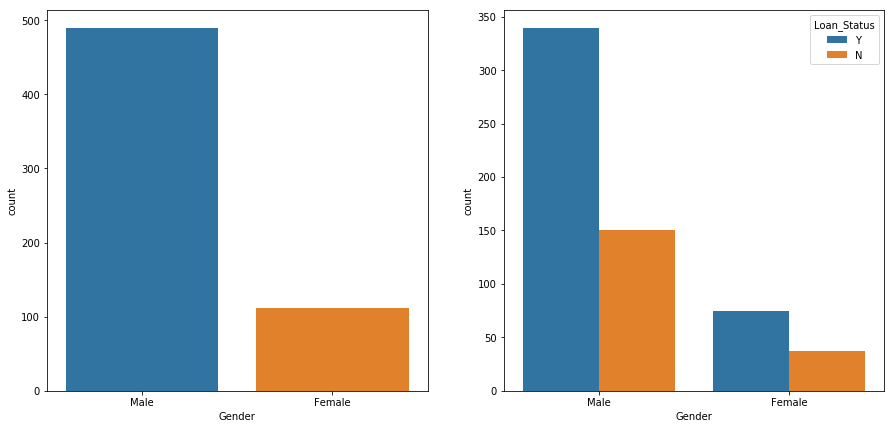

In [11]:
# seeing counts
print(df['Gender'].value_counts())

fig, axes = plt.subplots(ncols = 2, figsize=(15,7))
sns.countplot(df['Gender'], ax=axes[0])
sns.countplot(df['Gender'], hue=df['Loan_Status'], ax=axes[1])

In [12]:
# seeing all null values
df[df['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
